# Prédiction du prix des voitures

## Objectif du projet :
Ce projet vise à prédire le prix des voitures en fonction de différentes caractéristiques telles que l'année, le type de carburant, et d'autres variables.
Nous utiliserons des algorithmes d'apprentissage automatique pour construire un modèle de prédiction précis.

# Importation des bibliothèques nécessaires

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Chargement du dataset

Le dataset provient de Kaggle et contient diverses informations sur les voitures, notamment leur année de fabrication, leur prix et leur type de carburant.

In [69]:
file_path = "car_price_dataset.csv"
df = pd.read_csv(file_path)

# Explorons nos données

In [70]:
print(df.head())

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


In [71]:
print(df.describe())

               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  


In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None


In [73]:
print(df.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


PAnalysons quelques facettes de notre jeu de données :
- Rapport type de carburant et prix

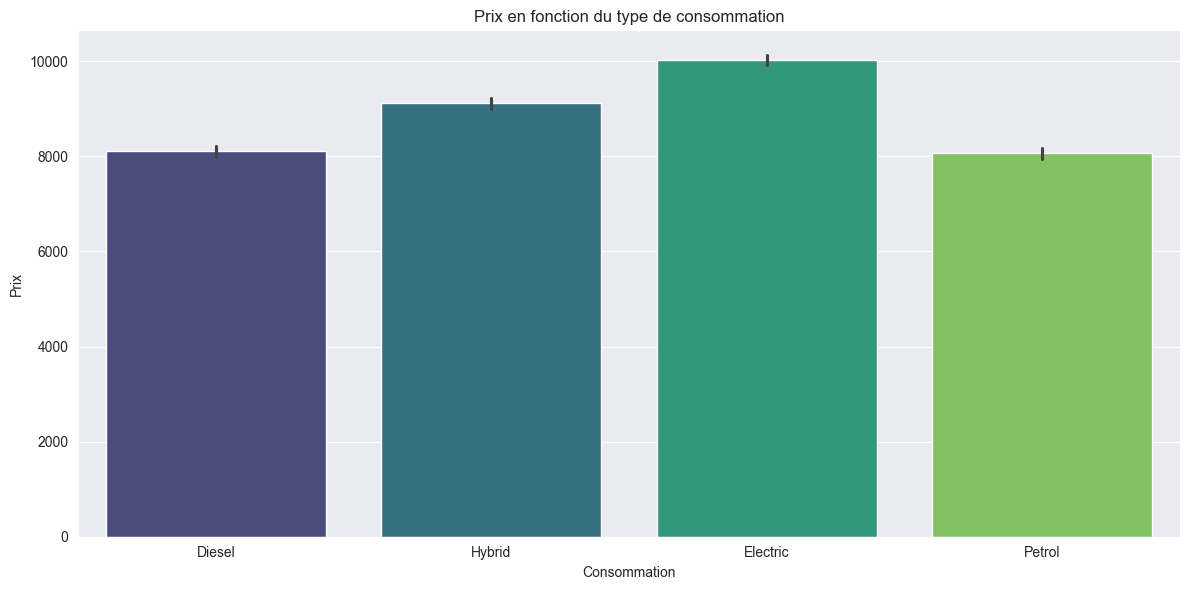

In [95]:
veh_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x = df['Fuel_Type'], y = df['Price'], hue = df['Fuel_Type'], palette='viridis', legend = False)
plt.title('Prix en fonction du type de carburant')
plt.xlabel('Type de Carburant')
plt.ylabel('Prix')
plt.tight_layout()
plt.show()

- Prix des véhicules en fontion des années

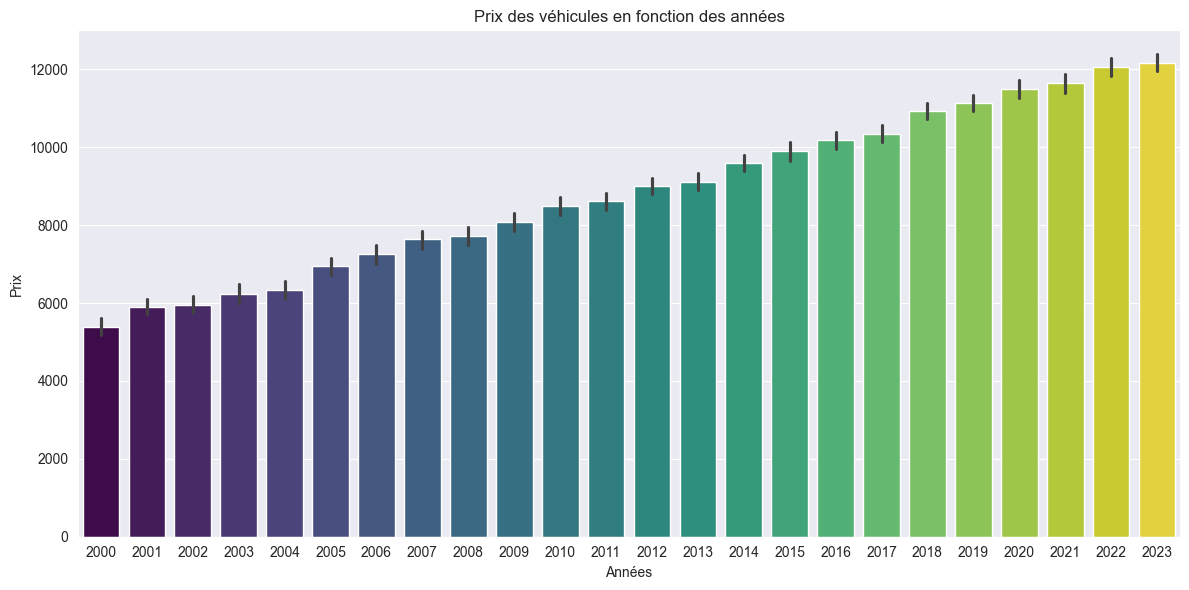

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x = df['Year'], y = df['Price'], hue = df['Year'], palette='viridis', legend = False)
plt.title('Prix des véhicules en fonction des années')
plt.xlabel('Années')
plt.ylabel('Prix')
plt.tight_layout()
plt.show()

# Prétraitement
Étant donné que nous n'avons pas besoin gérer les valeurs manquantes, nous allons commencer d'abord par différencier la colonne de prédiction et ceux d'entraînements

In [75]:
y = df.Price
X = df.drop(['Price'], axis = 1)

Ensuite, nous allons maintenant dégager les variables catégoriques et les encoder en binaire (OneHotEncoder).

In [76]:
cat_columns = [col for col in X.columns if X[col].dtypes == 'object']
print(cat_columns)
X = pd.get_dummies(X, columns = cat_columns, drop_first = True)

['Brand', 'Model', 'Fuel_Type', 'Transmission']


Prenons le temps de regarder encore nos données

In [77]:
print(X.head())

   Year  Engine_Size  Mileage  Doors  Owner_Count  Brand_BMW  Brand_Chevrolet  \
0  2020          4.2   289944      3            5      False            False   
1  2012          2.0     5356      2            3      False             True   
2  2020          4.2   231440      4            2      False            False   
3  2023          2.0   160971      2            1      False            False   
4  2003          2.6   286618      3            3      False            False   

   Brand_Ford  Brand_Honda  Brand_Hyundai  ...  Model_Sonata  Model_Sportage  \
0       False        False          False  ...         False           False   
1       False        False          False  ...         False           False   
2       False        False          False  ...         False           False   
3       False        False          False  ...         False           False   
4       False        False          False  ...         False           False   

   Model_Tiguan  Model_Tucson  M

Départageons nos données en données d'entraînements et données de test, avec un ratio de 80%-20%

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Entraînement du model

Nous allons faire des prédictions avec deux modèles différents :
- DecisionTreeRegressor
- RandomForestRegressor

Pour nous faciliter la tâche, nous allons définir une fonction qui retournera le *mean_absolute_erreur* en vue de voir quelle est le modèle avec une meilleure précision.

In [79]:
def score_mae(X_t, X_v, y_t, y_v, model):
    model.fit(X_t, y_t)
    pred = model.predict(X_v)
    return mean_absolute_error(y_v, pred)

# Evaluation du modèle

- RandomForestRegressor

In [80]:
print("Score pour la forêt aléatoire : ", score_mae(X_train, X_val, y_train, y_val, RandomForestRegressor(n_estimators = 100, random_state = 1)))

Score pour la forêt aléatoire :  436.86445499999996


- DecisionTreeReegressor : Nous essayerons dans un premier temps de déterminer une profondeur d'arbre idéale pour une meilleure comparaison.

Pourquoi ? Afin d'éviter des problèmes d'underfit ou d'overfit

In [88]:
candidate_mln = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
mln_scores = {
    m : score_mae(X_train, X_val, y_train, y_val, DecisionTreeRegressor(max_leaf_nodes = m, random_state = 1))
    for m in candidate_mln
}
best_tree_size = min(mln_scores, key = mln_scores.get)
print("Profondeur idéale : ",best_tree_size)

{100: 900.1897585494413, 500: 745.1094437511927, 1000: 687.5718091846493, 5000: 649.4655124999999, 10000: 648.1815, 50000: 648.1815, 100000: 648.1815, 500000: 648.1815}
10000


Nous avons sctocké la profondeur idéale pour l'arbre de décision dans #best_tree_size

_Remarques_ : Lors de mon apprentissage, il a été conseillé que lorsqu'on a la profondeur idéale, on entraîne le modèle avec l'ensemble des données, mais nous, nous n'allons pas le faire. (Bon à savoir)

In [87]:
print("Score pour la l'arbre de décision : ", score_mae(X_train, X_val, y_train, y_val, DecisionTreeRegressor(max_leaf_nodes = best_tree_size,random_state = 1)))

Score pour la l'arbre de décision :  648.1815


# Conclusion
Nous avons exploré et préparé les données et effectuer des visualisations.
Nous avons testé deux modèles : **Decision Tree** et **Random Forest**.
**Random Forest** donne de meilleurs résultats en termes de MAE, ce qui en fait un bon choix pour ce problème.
